In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas
import sh

seaborn.set(font_scale=1.5)

numjobs = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
numdisks = [1, 2, 3]

jq = sh.jq.bake('-M', '-r')

In [2]:
iops = pandas.DataFrame()
for i in numdisks:
  tmp = []
  for j in numjobs:
    data = jq('.jobs[0].write.iops',
              'results/{:d}-disks/{:d}-jobs/fio.json'.format(i, j))
    tmp.append(float(data.strip()))
  iops['{:d} disks'.format(i)] = pandas.Series(tmp, numjobs)

In [3]:
lat = pandas.DataFrame()
for i in numdisks:
  tmp = []
  for j in numjobs:
    data = jq('.jobs[0].write.lat_ns.mean',
              'results/{:d}-disks/{:d}-jobs/fio.json'.format(i, j))
    tmp.append(float(data.strip()))
  lat['{:d} disks'.format(i)] = pandas.Series(tmp, numjobs)

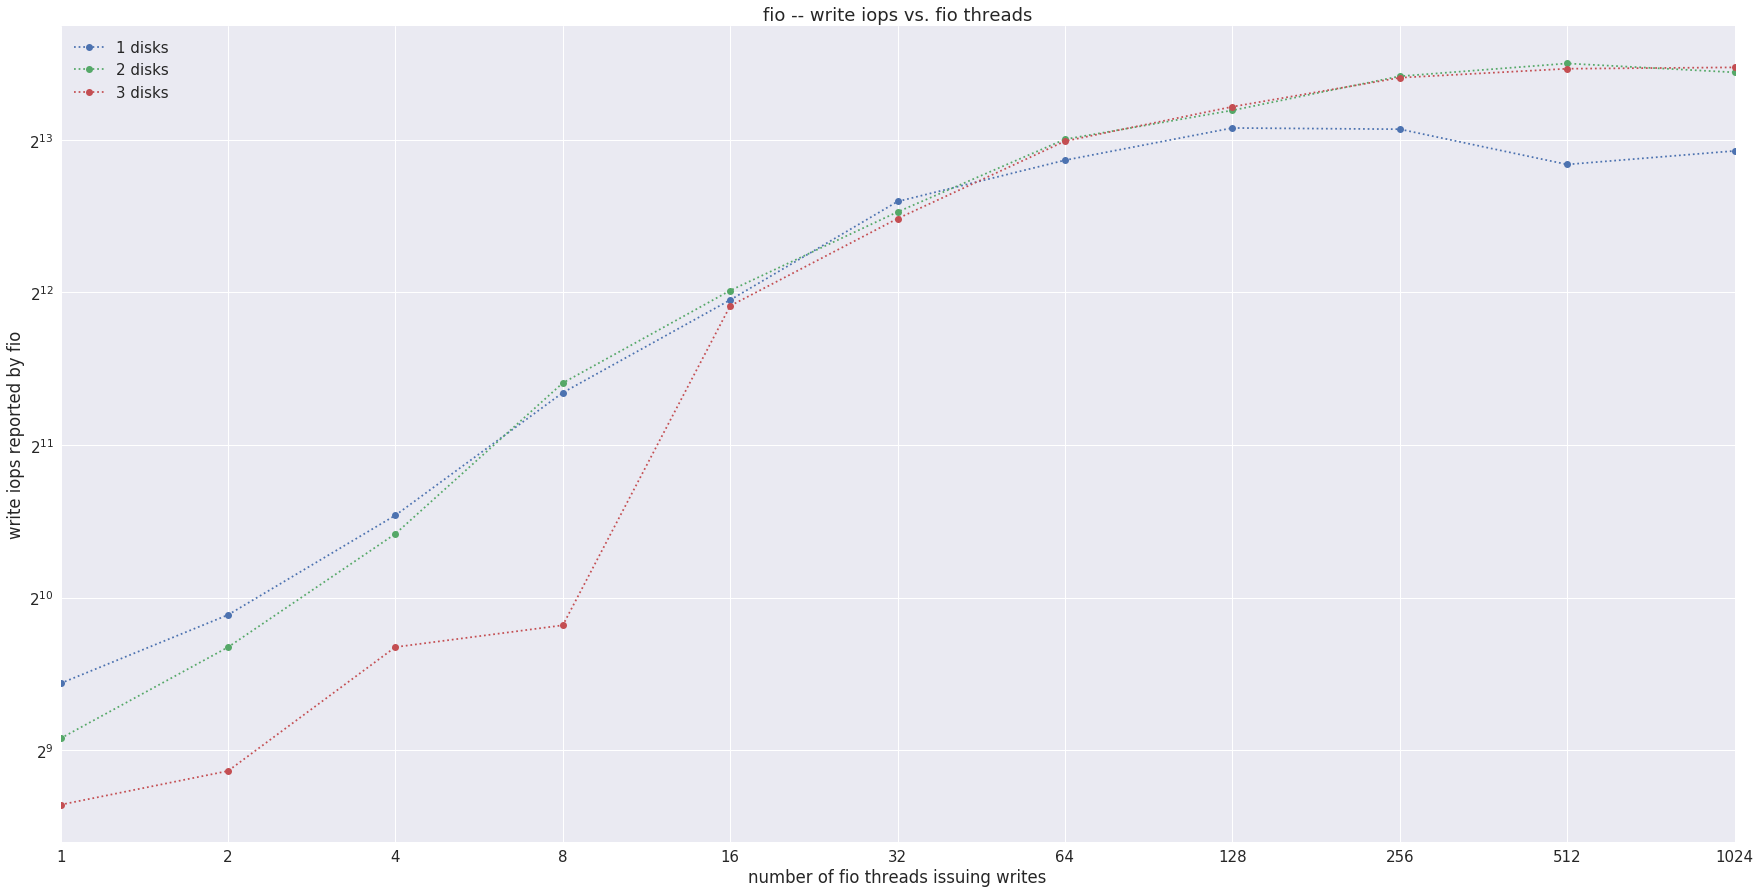

In [4]:
iops.plot(figsize=(30, 15), style=':o')
plt.title('fio -- write iops vs. fio threads')
plt.xlabel('number of fio threads issuing writes')
plt.ylabel('write iops reported by fio')
plt.loglog(basey=2)
plt.xticks(iops.index, iops.index)
plt.show()

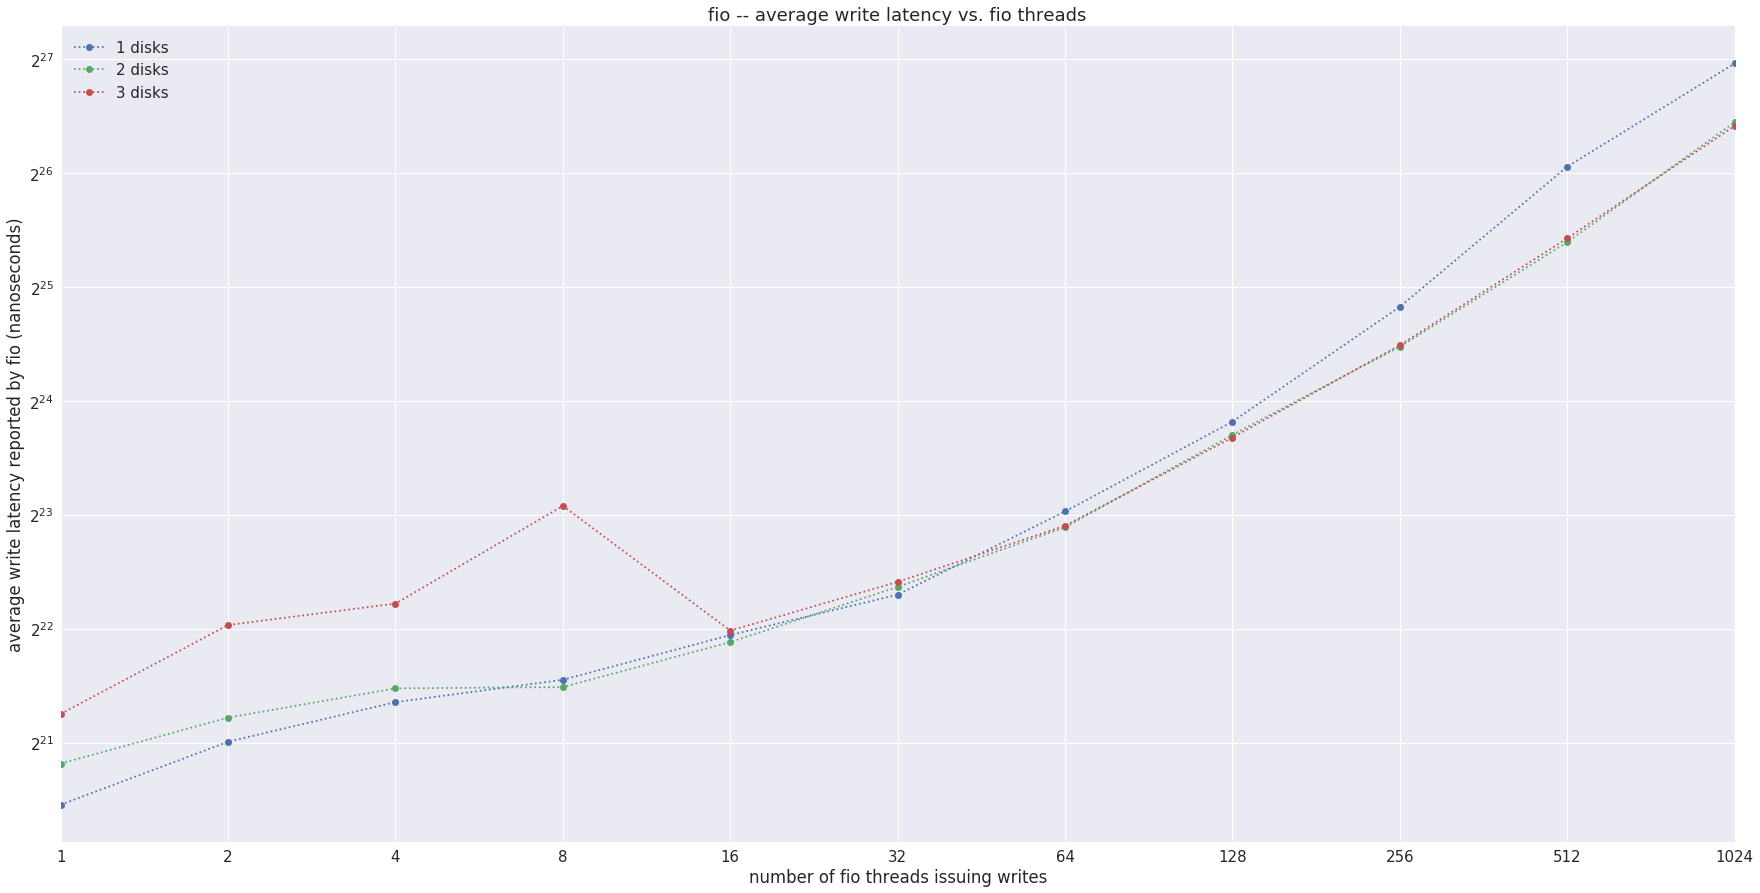

In [5]:
lat.plot(figsize=(30, 15), style=':o')
plt.title('fio -- average write latency vs. fio threads')
plt.xlabel('number of fio threads issuing writes')
plt.ylabel('average write latency reported by fio (nanoseconds)')
plt.loglog(basey=2)
plt.xticks(lat.index, lat.index)
plt.show()